# Shunique - Company Background
Shunique is a hot new online women's shoe company that is known for their unique shoe combinations.  Founded by auto tire amgnate Joseph Flatbush and his daugthers Jenna and Jamaica.  He believed that just like car tires, women's shoes should be unique and stylish. However, a bold choice to release a "silver vegan leather sandal" that had very few sales has left the company to turn towards their data in search of the next big shoe hit.  The company doesn't know much about their data and have not been keeping up with their monthly, quarterly, and yearly performance.    You were hired as a data analyst to help them answer key questions.  You were given all the shoe sales transactions from Aug 2018 to Aug 2020.  They do know a few statistics:  (1) They have generated \$166,936,995 in total sales since opening (2) The top 3 cities for number of shoes sold are Washington, DC, Houston, Tx, and El Paso, Tx (See Figure below).  They have also provided you with a codebook describing all the columns and their potential values.
<img src="num_shoes_sold_per_city.png">

## Question 1

**(1a.)** what was the name of the Best selling shoe and total sales for the Second Fiscal Quarter(Q2) of 2020?

**(1b)**. How did it compare to that shoe's sales in 2019 Q2?  Is it the hottest selling shoe in Q2 2019?  What else can you say about the Q2 2019 versus Q2 2020 performance of this shoe relative to other top sellers during these quarters?  

**Definition of Quarters:**
January, February, and March (Q1)
April, May, and June (Q2)
July, August, and September (Q3)
October, November, and December (Q4) 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedFormatter, FuncFormatter
import pandas as pd
import seaborn as sns
from scipy import stats
store = pd.read_csv("transactions.csv")
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105257 entries, 0 to 1105256
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   first_name       1105257 non-null  object 
 1   last_name        1105257 non-null  object 
 2   email            1105257 non-null  object 
 3   city             1105257 non-null  object 
 4   address          1105257 non-null  object 
 5   state            1105257 non-null  object 
 6   transactionDate  1105257 non-null  object 
 7   transactionID    1105257 non-null  object 
 8   time             1105257 non-null  object 
 9   quantity         1105257 non-null  int64  
 10  name             1105257 non-null  object 
 11  color            1105257 non-null  object 
 12  materials        1105257 non-null  object 
 13  prices           1105257 non-null  float64
 14  feature          1071074 non-null  object 
 15  category         1105257 non-null  object 
 16  cost             1

In [2]:
store.head()

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
0,Ximenes,Oxshott,xoxshott0@biglobe.ne.jp,Idaho Falls,5 Pearson Plaza,Idaho,04/04/2019,6e3e9c86-2251-44bc-8249-8045e5406cca,7:07 PM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-04-04
1,Urson,Wilcox,uwilcox2w@weather.com,Lima,8 Muir Road,Ohio,02/03/2019,aaacafb6-112c-41ad-baf1-44b54b17170b,3:21 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-02-03
2,Svend,De la Feld,sdelafeld58@last.fm,Wilmington,0 5th Pass,Delaware,07/21/2019,3727a9ae-9914-421c-9adc-eb4f1dd010f4,5:04 AM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-07-21
3,Laura,Potts,bmartin@scott-carr.info,Rodriguezmouth,03918 Rachel Meadows Apt. 214,Wisconsin,01/26/2019,649691c5-a77f-4ae2-bee1-4894a03b2dd3,06:26 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-01-26
4,Alicia,Barker,wduarte@yahoo.com,Port Elijah,5407 Conrad Divide,Arizona,12/13/2019,140995b6-91f1-465f-9491-c7413112a9ee,03:07 AM,5,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,299.75,2019-12-13


In [3]:
store['transactionDate'] = pd.to_datetime(store['transactionDate'])
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105257 entries, 0 to 1105256
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   first_name       1105257 non-null  object        
 1   last_name        1105257 non-null  object        
 2   email            1105257 non-null  object        
 3   city             1105257 non-null  object        
 4   address          1105257 non-null  object        
 5   state            1105257 non-null  object        
 6   transactionDate  1105257 non-null  datetime64[ns]
 7   transactionID    1105257 non-null  object        
 8   time             1105257 non-null  object        
 9   quantity         1105257 non-null  int64         
 10  name             1105257 non-null  object        
 11  color            1105257 non-null  object        
 12  materials        1105257 non-null  object        
 13  prices           1105257 non-null  float64       
 14  fe

In [4]:
store.head()

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
0,Ximenes,Oxshott,xoxshott0@biglobe.ne.jp,Idaho Falls,5 Pearson Plaza,Idaho,2019-04-04,6e3e9c86-2251-44bc-8249-8045e5406cca,7:07 PM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-04-04
1,Urson,Wilcox,uwilcox2w@weather.com,Lima,8 Muir Road,Ohio,2019-02-03,aaacafb6-112c-41ad-baf1-44b54b17170b,3:21 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-02-03
2,Svend,De la Feld,sdelafeld58@last.fm,Wilmington,0 5th Pass,Delaware,2019-07-21,3727a9ae-9914-421c-9adc-eb4f1dd010f4,5:04 AM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-07-21
3,Laura,Potts,bmartin@scott-carr.info,Rodriguezmouth,03918 Rachel Meadows Apt. 214,Wisconsin,2019-01-26,649691c5-a77f-4ae2-bee1-4894a03b2dd3,06:26 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-01-26
4,Alicia,Barker,wduarte@yahoo.com,Port Elijah,5407 Conrad Divide,Arizona,2019-12-13,140995b6-91f1-465f-9491-c7413112a9ee,03:07 AM,5,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,299.75,2019-12-13


Question 1A: what was the name of the Best selling shoe and total sales for the Second Fiscal Quarter(Q2) of 2020?

In [5]:
Q22020 = store[store.transactionDate.between('2020-04-01', '2020-06-30')]
Q22020

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
16,Kelly,Cooper,john15@ford-robbins.net,South Shaunburgh,30291 Ward Estates Apt. 026,Montana,2020-04-05,b65e96c1-2338-46a2-9623-ba9da6c8d81a,03:04 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2020-04-05
28,Courtney,White,andrewdalton@lynch.com,West Laura,0735 Rivas Haven Suite 222,Connecticut,2020-05-02,a5c6be32-69a4-44c2-bbf5-376de942c7a9,09:01 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2020-05-02
29,Harold,Floyd,urogers@yahoo.com,South Melanieburgh,584 Jonathan Heights,Georgia,2020-04-23,ffecd576-7f09-4c33-8ada-a42098e21b9e,12:07 PM,3,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,179.85,2020-04-23
39,Jared,Jones,fjohnson@hotmail.com,South Megan,0850 Kaiser Row Apt. 873,Pennsylvania,2020-04-06,0ca69e3c-4e32-4805-a4ca-a990aa6d7a76,12:34 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2020-04-06
45,Thomas,Wilson,antonio54@bennett-richards.biz,Sparksfurt,07199 Santiago Ports,Kansas,2020-04-30,5ee3c482-1f91-4be7-b3bd-b7bdc48d3330,12:28 PM,3,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,179.85,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105220,Jeremiah,Burke,christopher34@gmail.com,West Ann,9759 Richards Spring,Montana,2020-06-06,dd62bfaf-46be-46d2-a740-59e4a47dd6fd,08:33 PM,1,Cotton 'Royal Red Jaipur' Skirt (India) by Novica,pink,leather,44.99,water friendly,skateboarding,44.99,2020-06-06
1105224,Tanya,Nelson,mingram@pierce-smith.com,East Hannahport,03807 Michael Circle Apt. 687,Iowa,2020-04-30,bd1b4338-2c18-4b8c-b5f7-2fccf8d6d692,03:53 AM,1,Cotton 'Royal Red Jaipur' Skirt (India) by Novica,pink,leather,44.99,water friendly,skateboarding,44.99,2020-04-30
1105229,Nathan,Campos,scottstephanie@briggs.com,West Charlesburgh,6477 Jacqueline Curve,Vermont,2020-04-10,b8590c29-1202-4336-92ae-ae73a69f7783,06:42 PM,1,Cotton 'Royal Red Jaipur' Skirt (India) by Novica,pink,leather,44.99,water friendly,skateboarding,44.99,2020-04-10
1105236,Timothy,Chapman,cochranconnie@zimmerman.net,Michaelfurt,735 Ward Coves,Mississippi,2020-04-01,839f52d5-2732-4b6d-a8da-6f15c09fe140,03:24 AM,1,Cotton 'Royal Red Jaipur' Skirt (India) by Novica,pink,leather,44.99,water friendly,skateboarding,44.99,2020-04-01


In [6]:
best_selling_shoe_2020_Q2 = Q22020.groupby(by='name').sum().sort_values('cost', ascending=False)[:1]
best_selling_shoe_2020_Q2

,quantity,prices,cost
name,,,
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,68320.0,102480.0


In [7]:
Q22020['cost'].sum()

20348502.18

The bestselling shoe of the second quarter of 2020 was the Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3 at $102,480.0.$  Total sales for the second quarter of 2020 amounted to $20,348,502.18.

Question 1B: How did it compare to that shoe's sales in 2019 Q2? Is it the hottest selling shoe in Q2 2019? What else can you say about the Q2 2019 versus Q2 2020 performance of this shoe relative to other top sellers during these quarters?

In [8]:
Q22019 = store[store.transactionDate.between('2019-04-01', '2019-06-30')]
Mirak_Womens_Boot = Q22019[(Q22019.name == 'Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3')]
Mirak_Womens_Boot.cost.sum()

102480.0

In [9]:
best_selling_shoe_2019_Q2 = Q22019.groupby(by='name').sum().sort_values('cost', ascending=False)[:5]
best_selling_shoe_2019_Q2

,quantity,prices,cost
name,,,
Diamond Eternity Band,33,83979.80,138566.67
Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available,1218,82836.72,133459.16
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,72590.00,102480.00
Yu&yu Women's Shoes Round Toe Low Heel Oxfords Shoes More Colors Available,680,41560.41,74371.26
'pebbles' Tall Gladiator Pump (women),26,36800.00,59800.00


The Mirak Womens Boot total sales of 102,480 in Q2 2020 was the exact same number in sales as in Q2 2019. The top three sellers in Q2 2019 respectively had sales of 138,566.67, 133,459.16 and 102,480. While the Mirak Womens Boot was not the top seller in Q2 2020, the total sales of Q2 2020 posed a general increase in sales.

## Question 2

Over the life of the collected data,

**(2a)** What state has the highest total sales?  

**(2b)** Which state/district/terrritory sold the most shoes over this same period?  

**(2c)** Which state/district/terrritory sold the least number of shoes over this period?

In [10]:
state_highest_sales = store.groupby(by='state').sum().sort_values('cost', ascending=False)[:1]
state_highest_sales

,quantity,prices,cost
state,,,
Texas,43399,2534360.26,4046697.79


In [11]:
state_most_shoe_sales = store.groupby(by='state').sum().sort_values('quantity', ascending=False)[:1]
state_most_shoe_sales

,quantity,prices,cost
state,,,
Texas,43399,2534360.26,4046697.79


In [12]:
state_least_shoe_sales = store.groupby(by='state').sum().sort_values('quantity', ascending=True)[:1]
state_least_shoe_sales

,quantity,prices,cost
state,,,
District of Columbia,2770,156416.91,256872.67


Over the life of the data, Texas has had the highest total sales with $4,046, 697.79.

Texas has sold the most shoes: 43,399.

D.C. has sold the fewest shoes: 2770.

## Question 3
Jenna Flatbush wants to know what combination of shoes to introduce into low-performing cities.  You came up with the idea that they should start marketing combinations that are already selling well.

**(3.)** What combination of attributes have the most sales? [ color, materials, feature, category ]

In [13]:
store.groupby(['category', 'materials', 'feature', 'color'])[['cost']].agg('sum').sort_values('cost', ascending=False)[:5]

cost
category materials feature           color              
wedges   leather   travel friendly   black     881131.43
         rubber    diabetic approved black     713090.00
heels    leather   padding           black     523562.83
wedges   nubuck    strappy           metallic  473800.00
sandals  leather   wearable tech     black     409756.96

In [14]:
store.groupby(['category', 'materials', 'feature', 'color'])[['quantity']].agg('sum').sort_values('quantity', ascending=False)[:5]

quantity
category materials feature           color          
heels    leather   orthotic friendly black      2633
                   lightweight       black      2343
sandals  leather   diabetic approved black      2264
wedges   leather   stain-resistant   black      2245
heels    leather   insulated         black      2214

In terms of total money made, travel-friendly black leather wedges have the most sales. In terms of number of items sold, orthotic-friendly black leather heels have the most sales.

## Question 4

Jamaica Flatbush is unsure of how Shunique performed last year (2019). 

**(4a)** What were total sales?

**(4b)** Plot daily, monthly, quarterly sales for 2019. 

**(4c)** Are there any trends? 

**(4d)** In the monthly sales data, describe a significant event (ie. increase or decrease in sales) and hypothesize(make a wild guest) about its existence? What additional evidence(data) would be needed to support or negate your hypothesis.

In [15]:
FY2019 = store[store.transactionDate.between('2019-01-01', '2019-12-31')]
FY2019.head()

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
0,Ximenes,Oxshott,xoxshott0@biglobe.ne.jp,Idaho Falls,5 Pearson Plaza,Idaho,2019-04-04,6e3e9c86-2251-44bc-8249-8045e5406cca,7:07 PM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-04-04
1,Urson,Wilcox,uwilcox2w@weather.com,Lima,8 Muir Road,Ohio,2019-02-03,aaacafb6-112c-41ad-baf1-44b54b17170b,3:21 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-02-03
2,Svend,De la Feld,sdelafeld58@last.fm,Wilmington,0 5th Pass,Delaware,2019-07-21,3727a9ae-9914-421c-9adc-eb4f1dd010f4,5:04 AM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-07-21
3,Laura,Potts,bmartin@scott-carr.info,Rodriguezmouth,03918 Rachel Meadows Apt. 214,Wisconsin,2019-01-26,649691c5-a77f-4ae2-bee1-4894a03b2dd3,06:26 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-01-26
4,Alicia,Barker,wduarte@yahoo.com,Port Elijah,5407 Conrad Divide,Arizona,2019-12-13,140995b6-91f1-465f-9491-c7413112a9ee,03:07 AM,5,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,299.75,2019-12-13


Question 4A: What were total sales?

In [16]:
FY2019.cost.sum()

87005120.81000003

2019 Total Sales: $87,005,120.81

Question 4B: Plot daily, monthly, quarterly sales for 2019.

In [17]:
def currency(x, pos):
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    if x < 1000000 and x >= 1000:
        return '${:1.1f}K'.format(x*1e-3)
    return '${:1.0f}'.format(x)

formatter = FuncFormatter(currency)

In [18]:
FY2019 = FY2019.set_index('transactionDate')

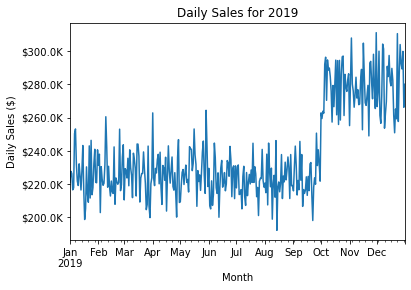

In [19]:
daily_sales = FY2019.groupby(pd.Grouper(freq='D'))['cost'].sum()
ax = daily_sales.plot()
ax.set_title('Daily Sales for 2019')
ax.set_ylabel('Daily Sales ($)')
ax.set_xlabel('Month')
ax.yaxis.set_major_formatter(formatter);

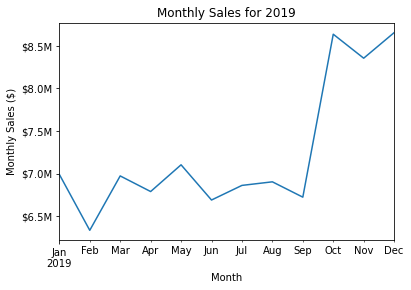

In [20]:
monthly_sales = FY2019.groupby(pd.Grouper(freq='M'))['cost'].sum()
ax = monthly_sales.plot()
ax.set_title('Monthly Sales for 2019')
ax.set_ylabel('Monthly Sales ($)')
ax.set_xlabel('Month')
ax.yaxis.set_major_formatter(formatter);

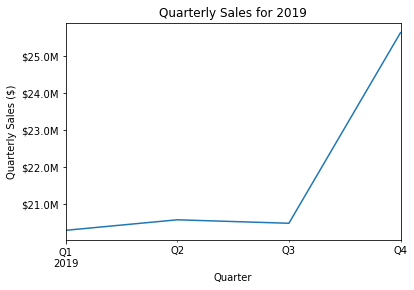

In [21]:
quarterly_sales = FY2019.groupby(pd.Grouper(freq='Q'))['cost'].sum()
ax = quarterly_sales.plot()
ax.set_title('Quarterly Sales for 2019')
ax.set_ylabel('Quarterly Sales ($)')
ax.set_xlabel('Quarter')
ax.yaxis.set_major_formatter(formatter);

Question 4C: Are there any trends?

It appears sales remained steady through the first three quarters of 2019 with a sharp dip between January and February, a relatively moderate increase between February and March, and a drastic increase between September and October (which remains high through December).

Question 4D: In the monthly sales data, describe a significant event (ie. increase or decrease in sales) and hypothesize(make a wild guest) about its existence? What additional evidence(data) would be needed to support or negate your hypothesis.

The increase in sales between September and October is the most significant event on the 2019 monthly sales chart, more pronounced than any other event on the chart. My hypothesis is that this sharp increase in sales results from spending in advance of Halloween. We would need to look specifically at the types of shoes being sold during this period to confirm whether this hypothesis is accurate.

## Question 5

A key metric for retail sales data is Average Purchase Value(APV).  APV measures the average value of each purchase made by your customers and will often compare that to the average number of units per transaction(ANU). The formula for APV is (Total Sales Revenue / Number of Customers or Transactions)

**(5a).** Calculate the Average Purchase Value for Q1 and Q4 of 2019.

**(5b).** Calculate the average number of units per transaction for Q1 and Q4

**(5c).** Describe the differences between Q1 and Q4 values.  Speculate on possible causes for differences(Hint: Seasonality)

Question 5A: Calculate the Average Purchase Value for Q1 and Q4 of 2019.

In [22]:
Q12019 = store[store.transactionDate.between('2019-01-01', '2019-03-31')]
Q42019 = store[store.transactionDate.between('2019-10-01', '2019-12-31')]

In [23]:
Q12019.cost.mean()

146.7532932057578

In [24]:
Q42019.cost.mean()

182.45593876975147

APV for the first quarter of 2019 was 146.75. APV for the fourth quarter of 2019 was 182.46.

Question 5B: Calculate the average number of units per transaction for Q1 and Q4

In [25]:
Q12019.quantity.mean()

1.5485398636386642

In [26]:
Q42019.quantity.mean()

1.9030522562785104

Average number of units per transaction for the first quarter of 2019 was 1.55. Average number of units per transaction for the fourth quarter of 2019 was 1.90.

Question 5C: Describe the differences between Q1 and Q4 values. Speculate on possible causes for differences(Hint: Seasonality)

APV and average number of units per transaction both increased from Q1 to Q4 in 2019. The most probable reason for this is the fact that October and especially November and December tend to be high spending months because of first Halloween and then the winter holidays and gift-buying for Christmas, and spending sharply decreases in January after the winter holidays because gift-buying for the winter holidays most prominently tends to be in advance of Dec 25.

## Question 6

Shunique is looking to expand its distribution centers so that it can outperform Zappos on delivery time to customers.  It is important to know what states and regions are epicenters for high sales and you have been asked to present the following results.

**(6a)** Report 2020 Sales by state - Present results tabularly 

**(6b)** In Tableau create a Map visualization of total sales(2018 - 2020) by Region [Northeast, West, Midwest, South].

In [27]:
FY2020 = store[store.transactionDate.between('2020-01-01', '2020-12-31')]

In [28]:
state_most_shoe_sales_2020 = FY2020.groupby(by='state').sum().sort_values('quantity', ascending=False)[:10]
state_most_shoe_sales_2020

,quantity,prices,cost
state,,,
Texas,13273,805415.02,1238215.58
California,12905,780505.85,1219721.54
Florida,11929,734357.36,1143359.72
New York,11579,703725.58,1074477.72
Ohio,10556,648858.71,1021461.58
Virginia,10457,656489.34,1009027.82
Georgia,10434,633150.60,988708.06
Oklahoma,10425,634248.40,996220.92
Washington,10396,639168.33,994863.51


In [29]:
state_least_shoe_sales_2020 = FY2020.groupby(by='state').sum().sort_values('quantity', ascending=True)[:5]
state_least_shoe_sales_2020

,quantity,prices,cost
state,,,
District of Columbia,948,57783.26,89926.21
Hawaii,9349,583556.57,887193.65
Maine,9377,577054.13,881449.26
Alaska,9425,583483.07,896748.81
North Dakota,9430,553603.59,850056.22


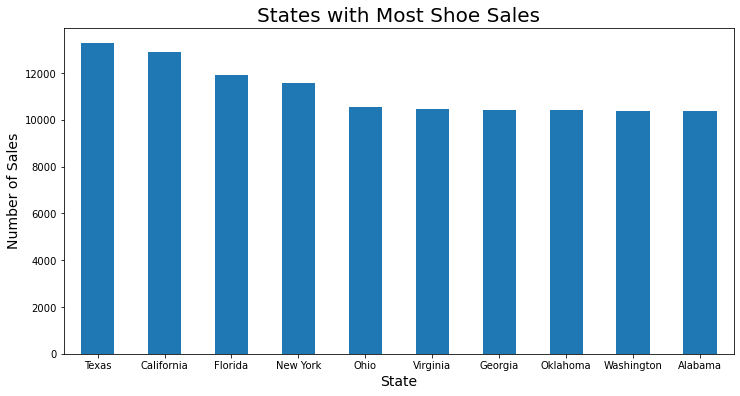

In [30]:
ax = state_most_shoe_sales_2020['quantity'].plot(kind='bar', figsize=(12,6), rot=0)
ax.set_title('States with Most Shoe Sales', size=20)
ax.set_xlabel('State', size=14)
ax.set_ylabel('Number of Sales', size=14);

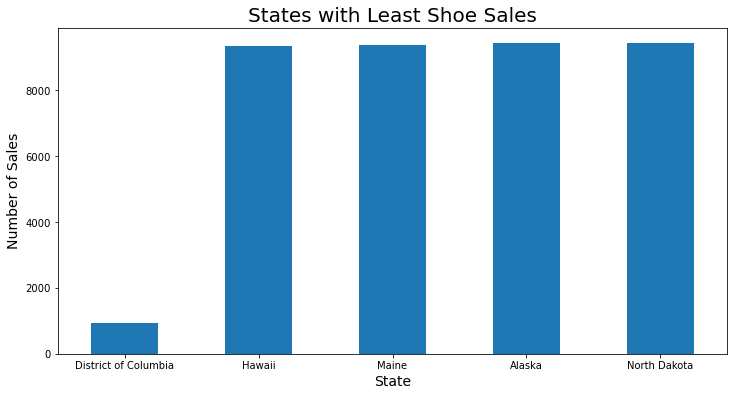

In [31]:
ax = state_least_shoe_sales_2020['quantity'].plot(kind='bar', figsize=(12,6), rot=0)
ax.set_title('States with Least Shoe Sales', size=20)
ax.set_xlabel('State', size=14)
ax.set_ylabel('Number of Sales', size=14);

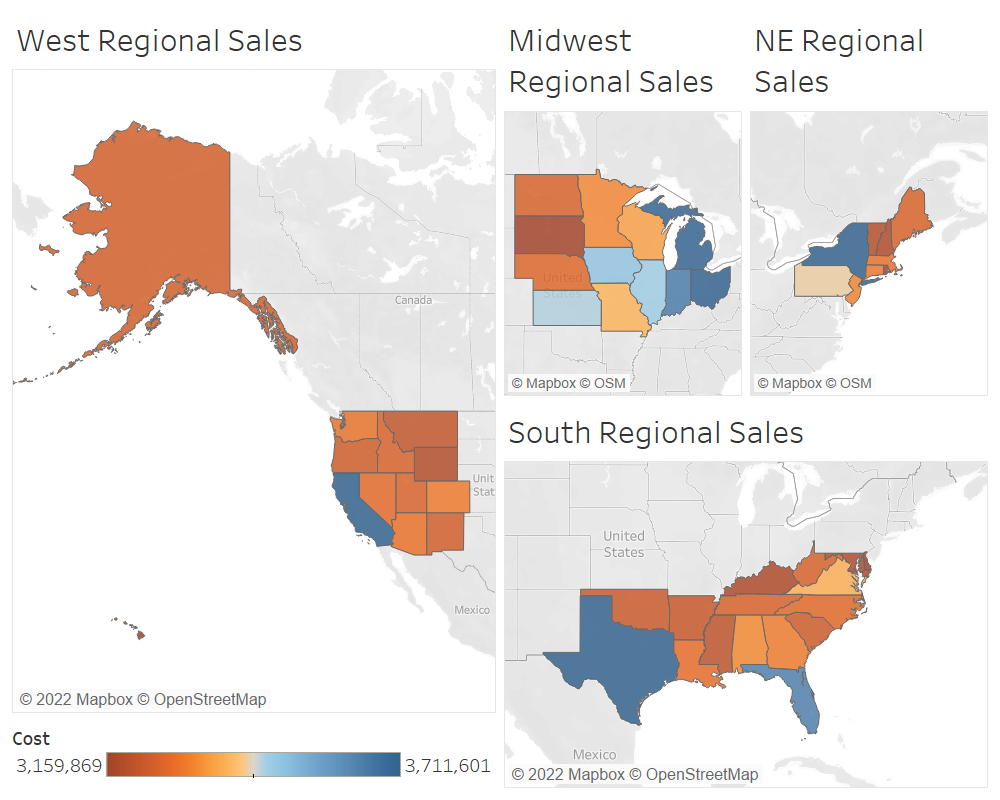

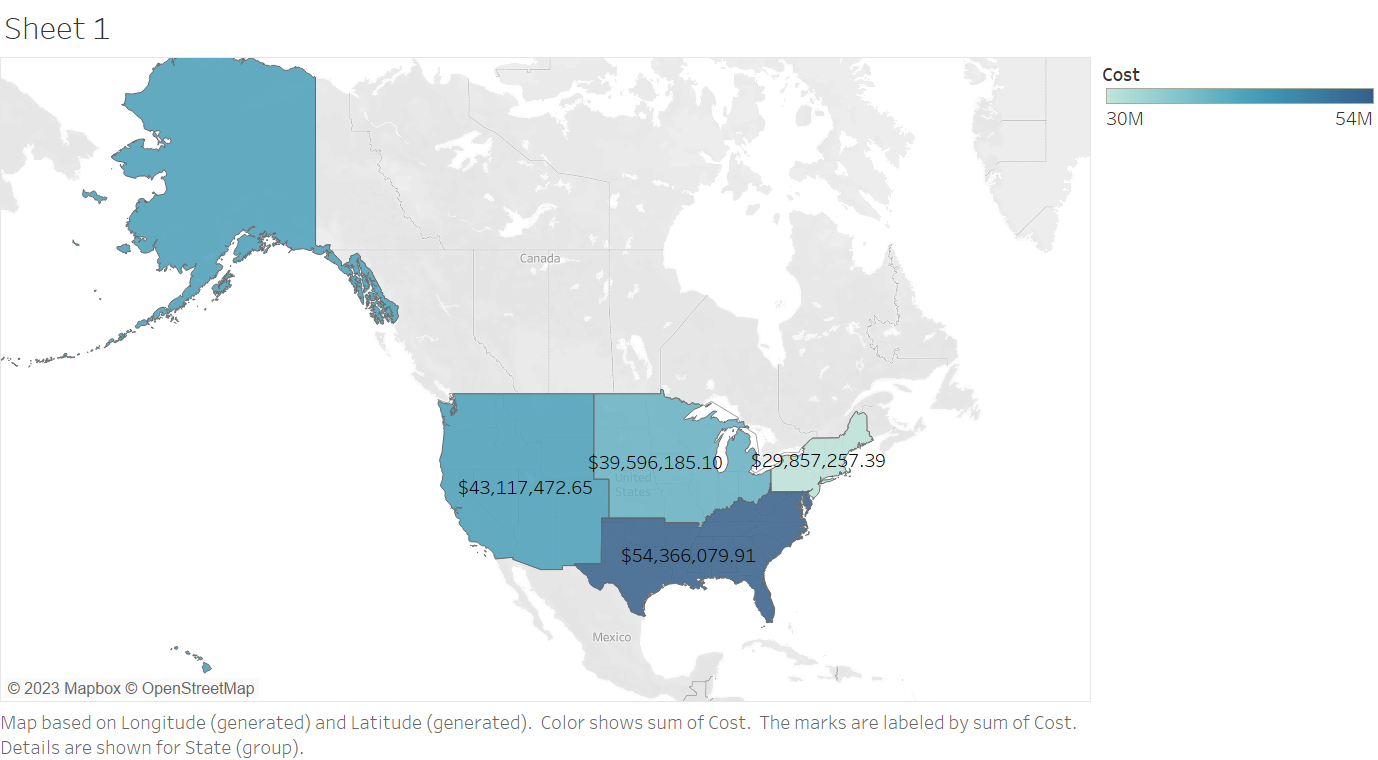

## Question 7

Use any type of plot to show the distribution of prices for the following shoe colors ('metallic', 'bronze', 'animal print', 'yellow')

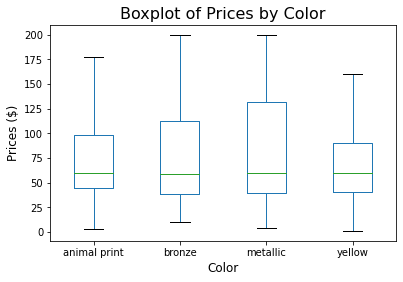

In [32]:
colors = store[store['color'].isin(['metallic', 'bronze', 'animal print', 'yellow'])]
storecolorchart = colors.boxplot('prices', by='color', rot=0, showfliers=False, grid=False)

storecolorchart.set_title('Boxplot of Prices by Color', size=16)
plt.suptitle('')

storecolorchart.set_xlabel('Color', size=12)
storecolorchart.set_ylabel('Prices ($)', size=12);

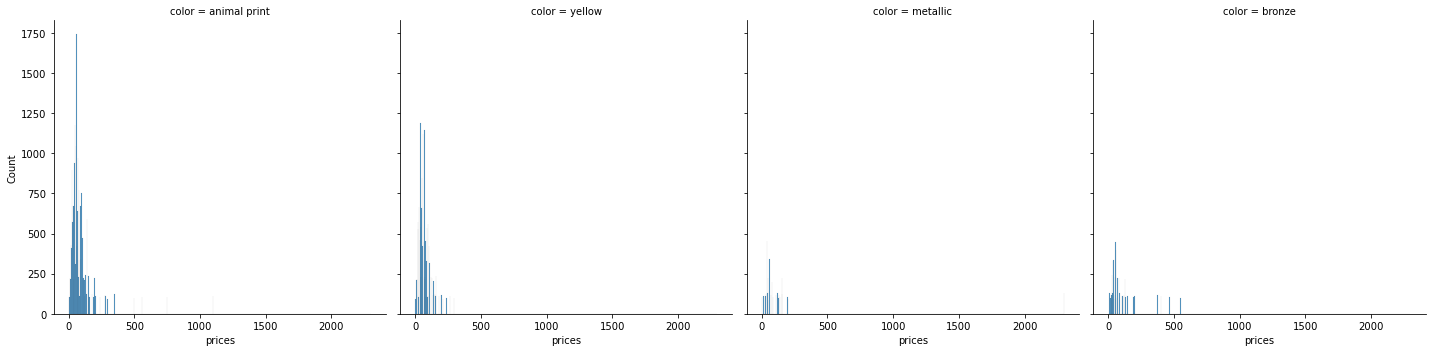

In [33]:
sns.displot(x='prices', data=store[store.color.isin(['metallic', 'bronze', 'animal print', 'yellow'])], col='color')

## Question 8

The Shunique marketing team is desperate to find the next big shoe hit.  They have asked for your help. 

**(8a)** Select a unique combination of shoe attributes then create a summary report with various statistics (ie Average sales price, city with most sales, quarter with most shoes sold, Customer name with highest purchase, etc)[it is your choice].  If the shoe combo doesn't exist in the dataset then choose another combination.

Next quarter they are going to release an animal print, leather, strappy, basketball shoe.  

In [34]:
unique_attributes = store[(store['color'] == 'animal print') & (store['category'] == 'basketball')]
unique_attributes.head()

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
149059,Abeu,Cocher,acocher9u@icq.com,Milwaukee,020 Bartelt Trail,Wisconsin,2019-07-25,47ec5b68-625a-4055-8a56-b754270333ce,7:53 PM,1,Women's Pink Paradox London Avery Wedge Sandal...,animal print,suede,59.96,diabetic approved,basketball,59.96,2019-07-25
149060,Walsh,Mathias,wmathiasmr@boston.com,Honolulu,005 Cherokee Way,Hawaii,2019-06-19,83e52762-ed9a-49ed-8f48-bfc9502f332e,6:08 PM,1,Women's Pink Paradox London Avery Wedge Sandal...,animal print,suede,59.96,diabetic approved,basketball,59.96,2019-06-19
149061,Emmey,Wennington,ewenningtonlb@businesswire.com,Houston,282 Mayer Road,Texas,2020-05-25,afbc5d78-de44-4212-aa8b-6b873886f6b7,8:51 AM,2,Women's Pink Paradox London Avery Wedge Sandal...,animal print,suede,59.96,diabetic approved,basketball,119.92,2020-05-25
149062,Jed,Norcutt,jnorcutt9s@admin.ch,Staten Island,6648 Schlimgen Trail,New York,2019-11-22,301b8f7d-85e2-4950-85e0-22f43bf9b19e,12:47 PM,1,Women's Pink Paradox London Avery Wedge Sandal...,animal print,suede,59.96,diabetic approved,basketball,59.96,2019-11-22
149063,Melesa,Doxey,mdoxey85@boston.com,Nashville,23 Straubel Park,Tennessee,2020-01-17,e2bff041-5a0a-4612-b642-c2dd5552eb51,1:39 AM,1,Women's Pink Paradox London Avery Wedge Sandal...,animal print,suede,59.96,diabetic approved,basketball,59.96,2020-01-17


In [35]:
best_selling_attributes = store[(store['color'] == 'black') & (store['category'] == 'wedges')]
best_selling_attributes.head()

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
3953,Georgi,Southworth,gsouthworthy@oakley.com,Baton Rouge,891 Ronald Regan Avenue,Louisiana,2019-11-19,ffc71eb4-a11b-4dd0-8e98-a79e20596a8c,9:15 PM,1,Native Women's Verona Fashion Sneaker,black,polyester,40.0,vegan,wedges,40.0,2019-11-19
3955,Catherine,Hunnable,chunnable7w@cmu.edu,Washington,4951 Bashford Road,District of Columbia,2019-10-01,4ff2d714-7fcf-4058-b1de-9559d0633e23,12:54 AM,1,Native Women's Verona Fashion Sneaker,black,polyester,40.0,vegan,wedges,40.0,2019-10-01
3957,Casi,Cahen,ccahenrr@github.com,Washington,3393 Riverside Way,District of Columbia,2020-05-03,60001b69-fa1d-40bb-b549-1f430c1ecbca,8:06 AM,1,Native Women's Verona Fashion Sneaker,black,polyester,40.0,vegan,wedges,40.0,2020-05-03
3959,Felipa,Fudge,ffudge5o@fastcompany.com,Naples,82 Stuart Trail,Florida,2019-10-20,8de23e7d-84d9-4d9e-a217-e46831176e82,4:59 PM,3,Native Women's Verona Fashion Sneaker,black,polyester,40.0,vegan,wedges,120.0,2019-10-20
3961,Pietrek,Lickorish,plickorishiu@soup.io,El Paso,53100 Bunting Trail,Texas,2019-05-30,b02180f0-4c0d-49a2-ba41-51b62cb91569,6:14 PM,1,Native Women's Verona Fashion Sneaker,black,polyester,40.0,vegan,wedges,40.0,2019-05-30


In [36]:
unique_attributes.cost.mean()

136.20487777777862

In [37]:
best_selling_attributes.cost.mean()

171.66380926403122

In [38]:
unique_attributes.cost.sum()

122584.39000000001

In [39]:
best_selling_attributes.cost.sum()

8809271.7

In [40]:
store.cost.mean()

151.03907511998082

In [41]:
unique_attributes.quantity.mean()

1.568888888888889

In [42]:
best_selling_attributes.quantity.mean()

1.5983981916324026

In [43]:
unique_attributes.shape

(900, 18)

In [44]:
unique_attributes.groupby(by='city').sum().sort_values('quantity', ascending=False)[:1]

,quantity,prices,cost
city,,,
Kansas City,7,156.32,521.32


In [45]:
unique_attributes.groupby(by='state').sum().sort_values('quantity', ascending=False)[:1]

,quantity,prices,cost
state,,,
Massachusetts,44,1910.73,3829.46


In [46]:
unique_attributes.groupby(by='feature').sum().sort_values('quantity', ascending=False)[:1]

,quantity,prices,cost
feature,,,
travel friendly,333,23788.64,37642.68


In [47]:
unique_attributes.groupby(by='materials').sum().sort_values('quantity', ascending=False)[:1]

,quantity,prices,cost
materials,,,
manmade,522,30047.55,47090.99


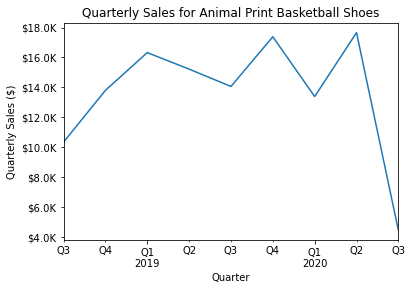

In [48]:
animalprint_basketballshoes = unique_attributes.set_index('transactionDate').groupby(pd.Grouper(freq='Q'))['cost'].sum()
ax = animalprint_basketballshoes.plot()
ax.set_title('Quarterly Sales for Animal Print Basketball Shoes')
ax.set_ylabel('Quarterly Sales ($)')
ax.set_xlabel('Quarter')
ax.yaxis.set_major_formatter(formatter);

The market for animal print basketball shoes appears to be very small.  Average sales price is 87.04 (which is below the overall APV of 94.71). The city with the most sales of this kind of shoe is Kansas city (with 7 shoe sales of this type) and the state with the most sales of this kind of shoe is Massachussets. The shoe's sales appeared to be doing well and trending upward until mid-2020, when sales suddenly plummeted between the second quarter of 2020 (when the shoe made nearly 18,000 dollars in total sales) and the third quarter of 2020 (in which the shoe made only roughly 5,000 dollars in total sales). The highest-selling feature for this kind of shoe is "travel-friendly," and the highest-selling material for this kind of shoe is "man-made."

In [49]:
store.groupby(by='color').sum().sort_values('quantity', ascending=False)[:5]

,quantity,prices,cost
color,,,
black,511686,30341322.98,48410535.70
white,151941,9531488.85,15237603.90
brown,149552,8329143.81,13263530.54
gray,120948,7549686.76,12004171.80
blue,106100,6366710.08,10138006.28


In [50]:
store.groupby(by='materials').sum().sort_values('quantity', ascending=False)[:5]

,quantity,prices,cost
materials,,,
leather,803662,46601520.03,74362594.03
fabric,316092,18219946.56,28970470.26
manmade,268689,15811957.36,25239023.15
suede,187282,11560810.28,18486231.06
canvas,71884,4327693.28,6921757.57


In [51]:
store.groupby(by='category').sum().sort_values('quantity', ascending=False)[:5]

,quantity,prices,cost
category,,,
heels,367137,21761937.55,34684750.78
sandals,300817,17909871.86,28441778.42
wedges,272327,17010098.71,27235972.72
boots,231883,13551908.53,21652845.76
flats,92209,5666109.11,9037315.86


In [52]:
store.groupby(by='feature').sum().sort_values('quantity', ascending=False)[:5]

,quantity,prices,cost
feature,,,
recycled material,63953,3528013.31,5594123.90
seamless,60628,3435105.68,5487526.68
orthopedic,59816,3351529.60,5340465.66
water friendly,59373,3724245.94,5930830.76
leather outsole,59256,3562978.21,5668111.17


As a note: Of the four traits associated with the new shoe being released next quarter, only one (leather) is an overall number-one top-selling trait for the store. Manmade material is a number-three selling trait.

## Question 9

**(9a)** Are there opportunities to grow sales?  

**(9b)** Are there products that you would discontinue? 

**(9c)** What other datasets would you use to complement the transaction data and why?

Question 9A: Are there opportunities to grow sales?

In [53]:
best_selling_attributes.groupby(by='city').sum().sort_values('quantity', ascending=False)[:1]

,quantity,prices,cost
city,,,
Washington,133,7704.57,11289.78


In [54]:
best_selling_attributes.groupby(by='city').sum().sort_values('quantity', ascending=True)[:1]

,quantity,prices,cost
city,,,
Kellyland,1,44.95,44.95


In [55]:
kellyland_shoes = store[store['city'] == "Kellyland"].groupby(by=['name']).sum().sort_values('quantity', ascending=False)[:3]
kellyland_shoes

,quantity,prices,cost
name,,,
Bl Tulip Gladiator Open Toe Shiny Faux Patent Lace Back Thigh High Stiletto Heel Boot Shoe Red,4,159.98,319.96
Keuka Suregrip Unisex - Adult Shock Mint Athletic Slip Resistant Work Shoes,4,54.98,219.92
Rocket Dog Women's Jazzinso Fashion Sneaker,4,39.95,159.80


In [56]:
best_selling_attributes.groupby(by='city').sum().sort_values('cost', ascending=False)[:1]

,quantity,prices,cost
city,,,
Lake Christopherfurt,5,4270.0,21350.0


In [57]:
best_selling_attributes.groupby(by='city').sum().sort_values('cost', ascending=True)[:1]

,quantity,prices,cost
city,,,
West Donnaview,1,3.99,3.99


In [58]:
west_donnaview_shoes = store[store['city'] == "West Donnaview"].groupby(by=['name']).sum().sort_values('cost', ascending=False)[:3]
west_donnaview_shoes

,quantity,prices,cost
name,,,
J/slides Capri Women Open Toe Leather Thong Sandal,3,80.00,240.00
Women's VANELi Madora Open-Toe Pump Black Satin by Vaneli,1,105.95,105.95
Women's White Mountain Cabe Clog Brown Tumbled Leather,1,44.95,44.95


My exploratory data analysis showed that black wedges--a nationally high-selling shoe with high-selling traits--sold highest in terms of quantity in Washington and most poorly in terms of quantity in Kellyland, and they sold highest in terms of sales in Lake Christopherfurt and most poorly in terms of sales in West Donnaview. 

It appears we have an opportunity to grow sales in both Kellyland and West Donnaview. In Kellyland, the highest selling shoe was a thigh-high stiletto heel red boot shoe, and in West Donnaview the highest selling shoe was an open-toe leather thong sandal. We could try to increase sales of these respective shoes, or we could try and market our best-sellers more intensively in these two places.

Question 9B: Are there products that you would discontinue?

In [59]:
store.groupby(by='name').sum().sort_values('cost', ascending=True)[:1]

,quantity,prices,cost
name,,,
Guess Ortena2 Bronze/black Ankle Booties Boots Size 6.5,181,0.99,1.81


I would discontinue the Guess Ortena2 Bronze/black Ankle Booties Boots Size 6.5. Despite the number of items sold, their price is quite literally 100 times below the APV.

Question 9C: What other datasets would you use to complement the transaction data and why?

This data would benefit from having a 'Profits' column. Without knowledge of profits, it's much more difficult to accurately pinpoint where sales are going wrong and how to correct them. Additionally, having a 'Region' category and providing zip codes would be much more helpful for sorting data geographically .

## Question 10

The sales team is asking for increased bonuses because they increased daily sales year-over-year. 

**(10)** Calculate the daily sales totals (cost) for the date ranges 8/1/2018-7/31/2019 and 8/1/2019-7/31/2020. Describe and compare the two distributions (center, variability, spread, and anomalies). Create a graphical display that makes this easy to understand.

In [60]:
FY2019 = store[store.transactionDate.between('2018-08-01', '2019-7-31')]
daily_FY2019 = FY2019.set_index('transactionDate').groupby([pd.Grouper(freq='D')])['cost'].sum()
daily_FY2019.describe()

count       364.000000
mean     218958.351236
std       14907.164720
min      184474.900000
25%      208845.960000
50%      218509.850000
75%      228999.307500
max      264349.600000
Name: cost, dtype: float64

In [61]:
FY2020 = store[store.transactionDate.between('2019-08-01', '2020-7-31')]
daily_FY2020 = FY2020.set_index('transactionDate').groupby([pd.Grouper(freq='D')])['cost'].sum()
daily_FY2020.describe()

count       366.000000
mean     237762.992814
std       27057.028698
min      192098.670000
25%      219427.377500
50%      227949.055000
75%      253349.587500
max      311104.730000
Name: cost, dtype: float64

C:\Users\cb1550\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


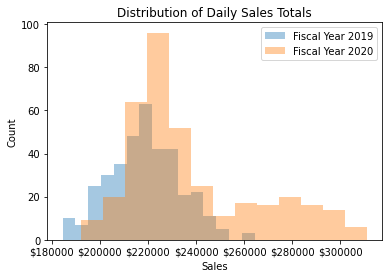

In [62]:
ax = sns.distplot(daily_FY2019, label="Fiscal Year 2019", kde=False)
sns.distplot(daily_FY2020, label="Fiscal Year 2020", kde=False)
ax.set(xlabel='Sales', ylabel='Count', title='Distribution of Daily Sales Totals')
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.legend()
plt.show()

## Question 11

Looking at the summary, the CEO says the sales don't look that different. 

**(11)** Is the difference in sales statistically significant enough to justify increased bonuses? (Answer using inference, either a significance test or comparison of confidence intervals)

We will perform a t-test for the difference between the sample means for FY 2019 and FY 2020 with a significance level  𝛼  = .05.

Our hypotheses:

H0:  𝜇 2020 -  𝜇 2019 = 0

(there is no difference in mean sales)

Ha:  𝜇 2020 -  𝜇 2019 > 0

(the mean sales in FY2020 were greater than in FY2019)

In [63]:
stats.ttest_ind(daily_FY2020, daily_FY2019, equal_var=False)

Ttest_indResult(statistic=11.63815231954758, pvalue=3.1466556982150907e-28)

Based on the p-value of 3.1466556982150907e-28 (which is considerably lower than the significance level of 0.05 established for the test), we can interpret a near zero probability of a Type 1 error (the event that the null hypothesis, Ho, is true but we reject it). As such, the data provide significant evidence against Ho. We can reject Ho and accept the alternative hypothesis, Ha, that the average daily sales in FY2020 were higher than the average daily sales in FY2019.